# Polynomial Linear regression

    y = b0 + b1*x1 + b2*x1^2 + .... + bn*x1^n

    Note: Linear beacuse we are takling of y in respect to bi(coefficients)
    
    
    

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
# Importing the dataset
dataset = pd.read_csv('./Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
dataset.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


Text(0.5, 1.0, 'Non linear dependencies between level and salary')

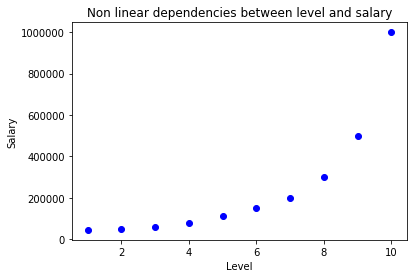

In [29]:
plt.scatter(X, y, color="blue")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Non linear dependencies between level and salary")

In [ ]:
# Splitting the dataset into the Training set and Test set

"""
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Fitting linear regression to the dataset

In [32]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Fitting polynomial regression to the dataset

In [152]:
from sklearn.preprocessing import PolynomialFeatures

poly_regressor = PolynomialFeatures(degree = 5)
x_poly = poly_regressor.fit_transform(X)
x_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [136]:
# x_poly = poly_regressor.fit_transform(X)
linear_regressor2 = LinearRegression()
linear_regressor2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Visualizing the linear regression results

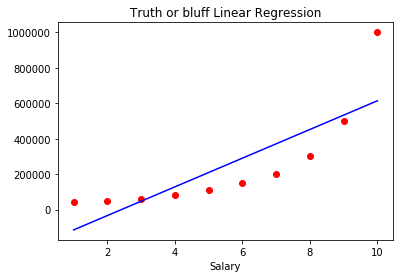

In [132]:
plt.scatter(X, y, color = "red")
plt.plot(X, linear_regressor.predict(X), color = "blue")

plt.title("Truth or bluff Linear Regression")
plt.xlabel("Position Level")
plt.xlabel("Salary")
plt.show()

# Visualizing the Polynomial regression results

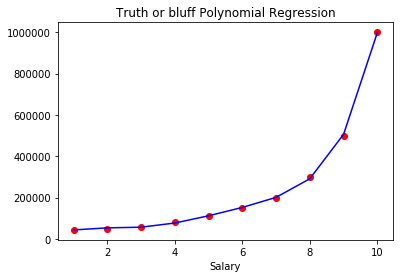

In [161]:
plt.scatter(X, y, color = "red")
plt.plot(X, linear_regressor2.predict(poly_regressor.fit_transform(X)), color = "blue")

plt.title("Truth or bluff Polynomial Regression")
plt.xlabel("Position Level")
plt.xlabel("Salary")
plt.show()

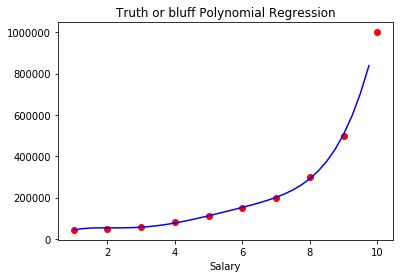

In [163]:
x_grid = np.arange(min(X), max(X), 0.25)
x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(X, y, color = "red")
plt.plot(x_grid, linear_regressor2.predict(poly_regressor.fit_transform(x_grid)), color = "blue")

plt.title("Truth or bluff Polynomial Regression")
plt.xlabel("Position Level")
plt.xlabel("Salary")
plt.show()

# Prediction of new result - Linear

In [180]:
data = np.array([2.5, 3.5, 5.2, 7,8]).reshape(-1, 1)
linear_regressor.predict(data)

array([  6863.63636364,  87742.42424242, 225236.36363636, 370818.18181818,
       451696.96969697])

# Prediction of new result - Polynomial

In [182]:
data = np.array([2.5, 3.5, 5.2, 7,8]).reshape(-1, 1)
linear_regressor2.predict(poly_regressor.fit_transform(data))

array([ 53978.74781542,  64805.41593921, 120125.02109188, 201349.65034971,
       291571.0955704 ])

In [183]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000
